#**Kết nối Google drive với máy chủ Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Kiểm tra thư mục đang đứng**
gõ `pwd` và run để kiểm tra hiện tại ta đang đứng ở đâu


In [ ]:
pwd

'/content'

#**Di chuyến đến thư mục chứa file dataset**
gõ `cd + path`

In [ ]:
cd /content/drive/MyDrive/Machine Learning/Multiple Linear Regression

/content/drive/MyDrive/Machine Learning/Multiple Linear Regression


#**Kiểm tra các file**
gõ `ls` để kiểm tra có nhưng file gì ở trong thư mục đó

In [ ]:
ls

BDG.ipynb  test.csv  train.csv


#**Import các thư viện cần dùng**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#**Đọc file chứa dataset**

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
print(train.head(10))

   Unnamed: 0  Id  MSSubClass  ...  SaleType  SaleCondition  SalePrice
0           0   1          60  ...         8              4  12.247694
1           1   2          20  ...         8              4  12.109011
2           2   3          60  ...         8              4  12.317167
3           3   4          70  ...         8              0  11.849398
4           4   5          60  ...         8              4  12.429216
5           5   6          50  ...         8              4  11.870600
6           6   7          20  ...         8              4  12.634603
7           7   8          60  ...         8              4  12.206073
8           8   9          50  ...         8              0  11.774520
9           9  10         190  ...         8              4  11.678440

[10 rows x 72 columns]


# **Tiền xử lý dataset**

In [ ]:
train = train.drop(["Unnamed: 0", "Id"], axis=1)
test = test.drop(["Unnamed: 0", "Id"], axis=1)

In [ ]:
print(train.head(10))

   MSSubClass  MSZoning  LotArea  ...  SaleType  SaleCondition  SalePrice
0          60         3     8450  ...         8              4  12.247694
1          20         3     9600  ...         8              4  12.109011
2          60         3    11250  ...         8              4  12.317167
3          70         3     9550  ...         8              0  11.849398
4          60         3    14260  ...         8              4  12.429216
5          50         3    14115  ...         8              4  11.870600
6          20         3    10084  ...         8              4  12.634603
7          60         3    10382  ...         8              4  12.206073
8          50         4     6120  ...         8              0  11.774520
9         190         3     7420  ...         8              4  11.678440

[10 rows x 70 columns]


#**Phân chia dataset**
# 1.   Train
# 2.   Test





In [ ]:
# train_data = train.values[:]
train_data = train.values
# Dùng slicing để lấy tất cả các hàng của tất cả các cột trừ cột cuối cùng
X = train_data[:, :-1]
Y = train_data[:, -1].reshape(train_data.shape[0], 1)

test_data =  test.values
X_test = test_data[:, :-1]
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)

In [ ]:
print(X[[0]])

[[6.000e+01 3.000e+00 8.450e+03 1.000e+00 3.000e+00 3.000e+00 0.000e+00
  4.000e+00 0.000e+00 5.000e+00 2.000e+00 2.000e+00 0.000e+00 5.000e+00
  7.000e+00 5.000e+00 2.003e+03 2.003e+03 1.000e+00 0.000e+00 1.200e+01
  1.300e+01 1.000e+00 1.960e+02 2.000e+00 4.000e+00 2.000e+00 2.000e+00
  3.000e+00 3.000e+00 2.000e+00 7.060e+02 5.000e+00 0.000e+00 1.500e+02
  8.560e+02 1.000e+00 0.000e+00 1.000e+00 4.000e+00 8.540e+02 0.000e+00
  1.710e+03 1.000e+00 0.000e+00 2.000e+00 1.000e+00 3.000e+00 1.000e+00
  2.000e+00 6.000e+00 0.000e+00 1.000e+00 1.000e+00 2.000e+00 4.000e+00
  4.000e+00 2.000e+00 0.000e+00 6.100e+01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 2.000e+00 2.008e+03 8.000e+00 4.000e+00]]


#**Kiểm tra số chiều tất cả các bộ dữ liệu**

In [ ]:
print("Shape của X_train:", X.shape)
print("Shape của Y_train:", Y.shape)
print("\n")
print("Shape của X_test:", X_test.shape)
print("Shape của Y_test:", Y_test.shape)


Shape của X_train: (1200, 69)
Shape của Y_train: (1200, 1)


Shape của X_test: (258, 69)
Shape của Y_test: (258, 1)


#**Thêm 1 vào vector** $\overline{\mathbf{x}}$
$\mathbf{w}=\left[w_{0}, w_{1}, w_{2}, w_{3}\right]^{T}$
$\overline{\mathbf{x}}=\left[1, x_{1}, x_{2}, x_{3}\right]$

In [ ]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
one = np.ones(X_test.shape[0], )
X_test = np.vstack((one, X_test.T)).T

#**Xây dựng hàm xự đoán (Vectorization)**
$y \approx \overline{\mathbf{x}} \mathbf{w}=\hat{y}$

In [ ]:
def predict(Xbar, w):
  return np.dot(Xbar, w)

#Định nghĩa Cost
$\mathcal{L}(\mathbf{w})=\frac{1}{2m} \sum_{i=1}^{N}\left(y_{i}-\overline{\mathbf{x}}_{\mathbf{i}} \mathbf{w}\right)^{2}$

In [ ]:
def Cost(X_bar, y, w):
  m = y.size
  y_hat = predict(X_bar, w)
  square = np.square(y - y_hat)
  sum_error = np.sum(square)
  cost = sum_error / (2 * m)
  return cost

#**Cài đặt Gradient Descent**


In [ ]:
def fit(Xbar, y, learning_rate, iterations):
    w = np.zeros((Xbar.shape[1], 1))
    cost_list = []
    for i in range(iterations):
        m = y.size
        y_hat = predict(Xbar, w)
        cost = Cost(Xbar, y, w)
        derivative_theta = (np.dot(Xbar.T, y_hat - Y) / m)
        w = w - learning_rate * derivative_theta
        cost_list.append(cost)
        if(i % (iterations /  100) == 0):
            print("Iteration: {}, Cost: {}".format(i, cost))
    return w, cost_list

#**Train model**

In [ ]:
iterations = 50000
learning_rate = 0.000000001
wBGD, cost_list = fit(Xbar, Y, learning_rate, iterations=iterations)

Iteration: 0, Cost: 72.37539364066855
Iteration: 500, Cost: 0.1824990754226793
Iteration: 1000, Cost: 0.1267330450077464
Iteration: 1500, Cost: 0.09878730880334133
Iteration: 2000, Cost: 0.0780867608919284
Iteration: 2500, Cost: 0.06271175923450623
Iteration: 3000, Cost: 0.051264637700955455
Iteration: 3500, Cost: 0.04272070970631044
Iteration: 4000, Cost: 0.03632731228827869
Iteration: 4500, Cost: 0.031530503540354235
Iteration: 5000, Cost: 0.027921762578311835
Iteration: 5500, Cost: 0.025199177196928
Iteration: 6000, Cost: 0.02313913758892193
Iteration: 6500, Cost: 0.021575658610251184
Iteration: 7000, Cost: 0.020385248811936638
Iteration: 7500, Cost: 0.019475818437822544
Iteration: 8000, Cost: 0.018778532990272434
Iteration: 8500, Cost: 0.018241818452217767
Iteration: 9000, Cost: 0.017826940919969007
Iteration: 9500, Cost: 0.017504740327330123
Iteration: 10000, Cost: 0.017253211736688687
Iteration: 10500, Cost: 0.01705571029750183
Iteration: 11000, Cost: 0.016899616047021525
Iterati

#**Khảo sát sự thay đổi của Loss**

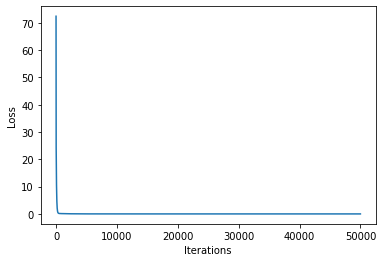

In [ ]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
iterations = np.arange(0, iterations)
plt.plot(iterations, cost_list)
plt.show()

#**Sử dụng thư viện để train model**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(Xbar, Y)
model = LinearRegression()
model.fit(Xbar, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#**So sánh kết quả giữa 2 mô hình dự đoán với giá trị thực**


In [ ]:
predictedSK = model.predict(X_test[[0]])
predicted = predict(X_test[[0]], w)
print("Giá trị dự đoán(Sklearn): ",predictedSK)
print("Giá trị thực: ", Y_test[0])
print("Giá trị dự đoán: ",predicted)

Giá trị dự đoán(Sklearn):  [[12.18517096]]
Giá trị thực:  [12.19551713]
Giá trị dự đoán:  [[12.18517088]]


#**Dùng thư viên để tính điểm của model**
*model ở đây là model của thư viện Sklearn*

In [ ]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_test)
score = r2_score(Y_test, Y_pred)
print(score)

0.9037963869315144


#**Giải phương trình đạo hàm = 0**
![Alt](https://i.imgur.com/HB6zJvw.png?2)

$\boldsymbol{w}=\left(\boldsymbol{X}^{\boldsymbol{\top}} \boldsymbol{X}\right)^{-1} \boldsymbol{X}^{\boldsymbol{\top}} \boldsymbol{y}$


In [ ]:
def NormalEquation(X, y):
  A = np.dot(X.T, X)
  b = np.dot(X.T, y)
  pseudo_inverse = np.linalg.pinv(A)
  w = np.dot(pseudo_inverse, b)
  return w

In [ ]:
wNM = NormalEquation(Xbar, Y)

predictedSK = model.predict(X_test[[0]])
predictNE = predict(X_test[[0]], wBGD)
predictedBGD = predict(X_test[[0]], wNM)
print("Giá trị dự đoán(Sklearn): ",predictedSK)
print("Giá trị dự đoán(BGD): ",predicted)
print("Giá trị dự đoán(NE): ", predictNE)
print("Giá trị thực: ", Y_test[0])

Giá trị dự đoán(Sklearn):  [[12.18517096]]
Giá trị dự đoán(BGD):  [[12.18517088]]
Giá trị dự đoán(NE):  [[12.13081273]]
Giá trị thực:  [12.19551713]
